<a href="https://colab.research.google.com/github/raviedu/TicketMaster/blob/master/QED_R_Training%2C_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with `ggplot2`

In [0]:
install.packages("agridat")
library("dplyr")
library("ggplot2")
library("tidyr")
library("agridat")

data(lee.potatoblight)
df <- lee.potatoblight
df <- df %>% mutate(date=as.POSIXct(date, format="%Y-%m-%d"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [0]:
head(df)

year,gen,col,row,rep,date,y
1983,064.37,1,1,1,1983-10-17,9
1983,064.1,2,1,1,1983-10-17,9
1983,RUA,3,1,1,1983-10-17,9
1983,WHA,4,1,1,1983-10-17,9
1983,TEKAU,5,1,1,1983-10-17,9
1983,1015.47,6,1,1,1983-10-17,9


## Bar plot

Selecting by n_years


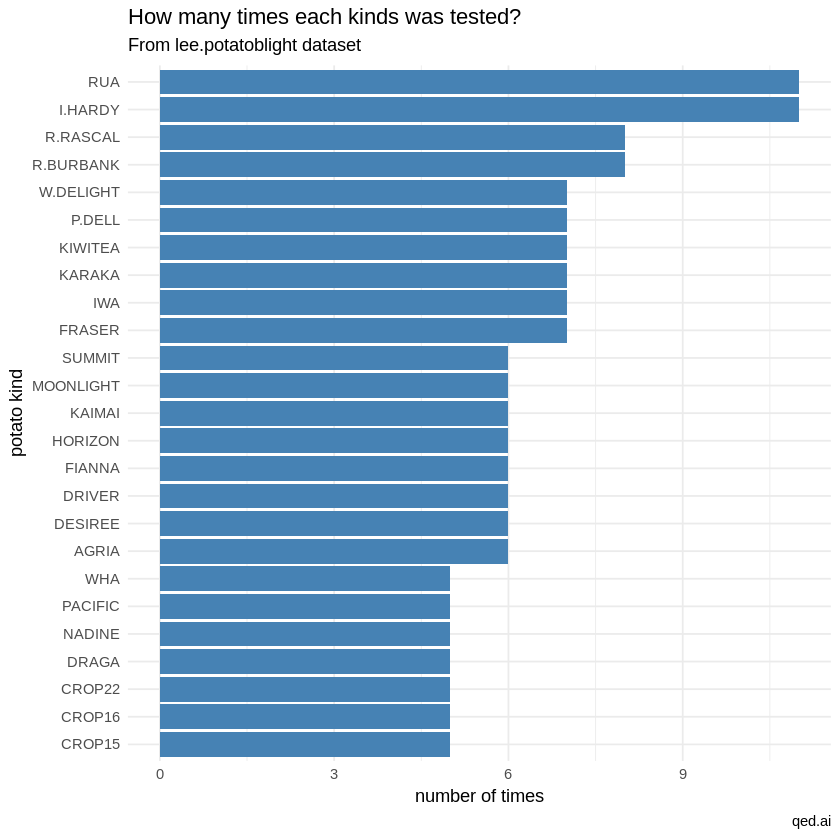

In [0]:
df_plots_occ <- df %>% 
    group_by(gen) %>%
    summarize(n_years=length(unique(year))) %>%
    arrange(desc(n_years)) %>%
    top_n(25) 
    
ggplot(df_plots_occ, aes(x=reorder(gen, n_years), y=n_years)) + 
    geom_bar(fill="steelblue", stat="identity")+
    theme_minimal() +
    coord_flip() + 
    labs(title="How many times each kind was tested?", subtitle="From lee.potatoblight dataset", y="number of times", x="potato kind", caption="qed.ai")

## Boxplot
What is standard deviation of measurements for same kinds in one experiment?

ggplot makes it easy to choose between many different themes  - here we are testing *The Economist* like theme

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


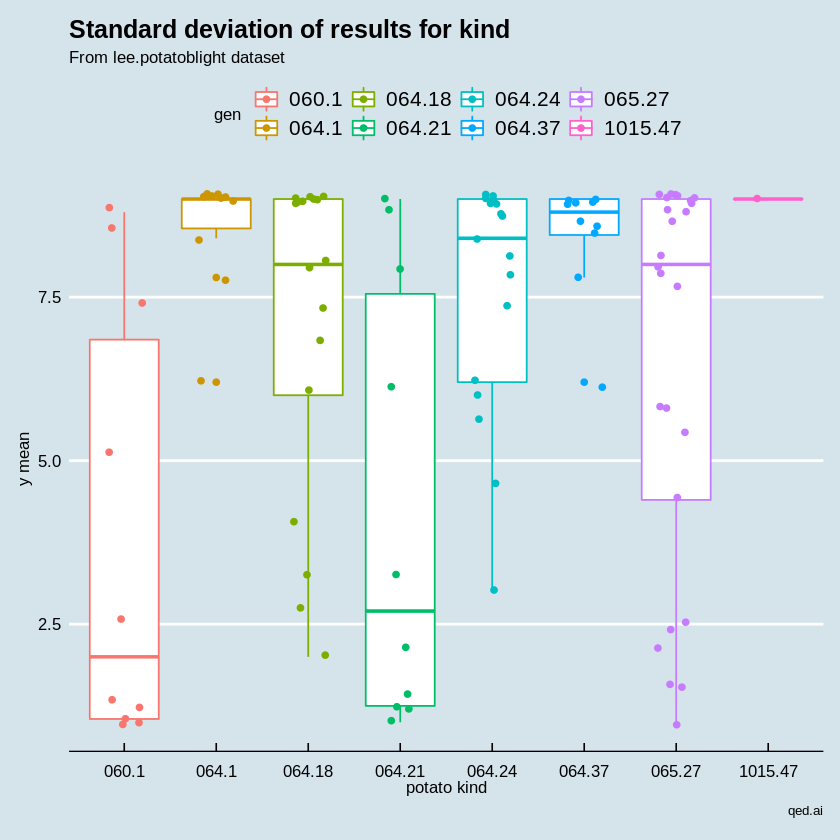

In [0]:
install.packages("ggthemes") 
library(ggthemes)

std_df <- df %>% 
    group_by(gen, date) %>%
    summarize(y_mean=mean(y, na.rm=TRUE), n_samples=n()) %>%
    arrange(desc(n_samples)) %>%
    head(n=100)

# std_df
ggplot(std_df, aes(y=y_mean, x=gen, color=gen)) +
    geom_boxplot() +
    geom_jitter(position=position_jitter(0.2)) +
    labs(title="Standard deviation of results for kind", subtitle="From lee.potatoblight dataset", y="y mean", x="potato kind", caption="qed.ai") +
    theme_economist()

# Scatter plot and line
Single kind resistance dynamics

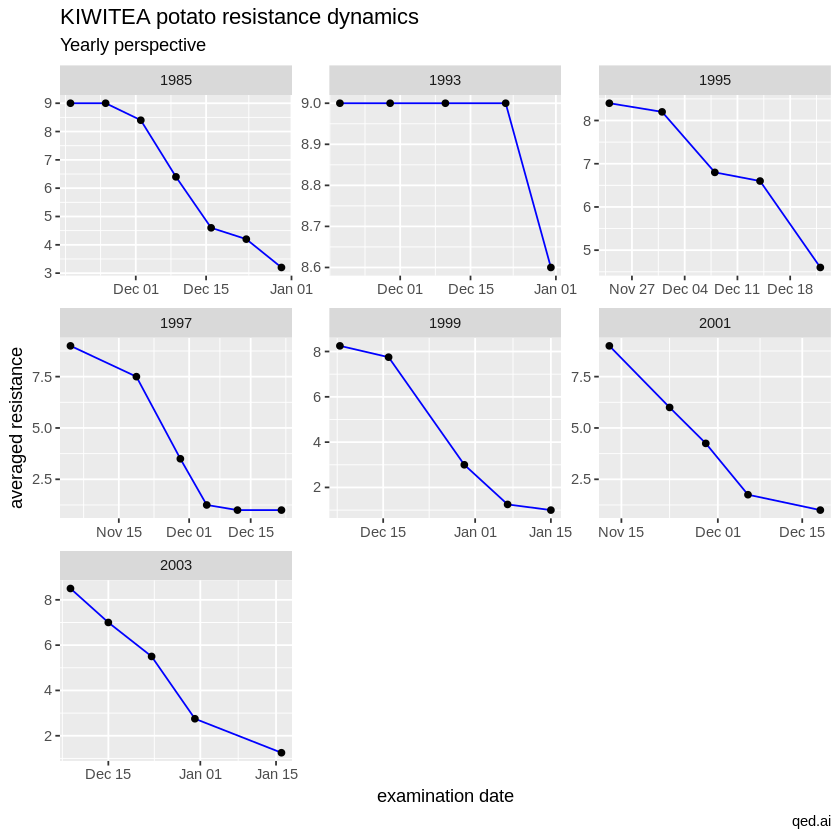

In [0]:
kind = "KIWITEA"

df_for_kind = df %>%
    filter(gen == kind) %>%
    group_by(year, date) %>%
    summarize(y=mean(y))

ggplot(df_for_kind, aes(x=date, y=y)) +
facet_wrap(~year, scales = "free") +
geom_line(color="blue") + 
geom_point() + 
labs(title=paste(kind, "potato resistance dynamics"), subtitle="Yearly perspective", y="averaged resistance", x="examination date", caption="qed.ai")

Can we do the same to compare dynamics of few kinds?

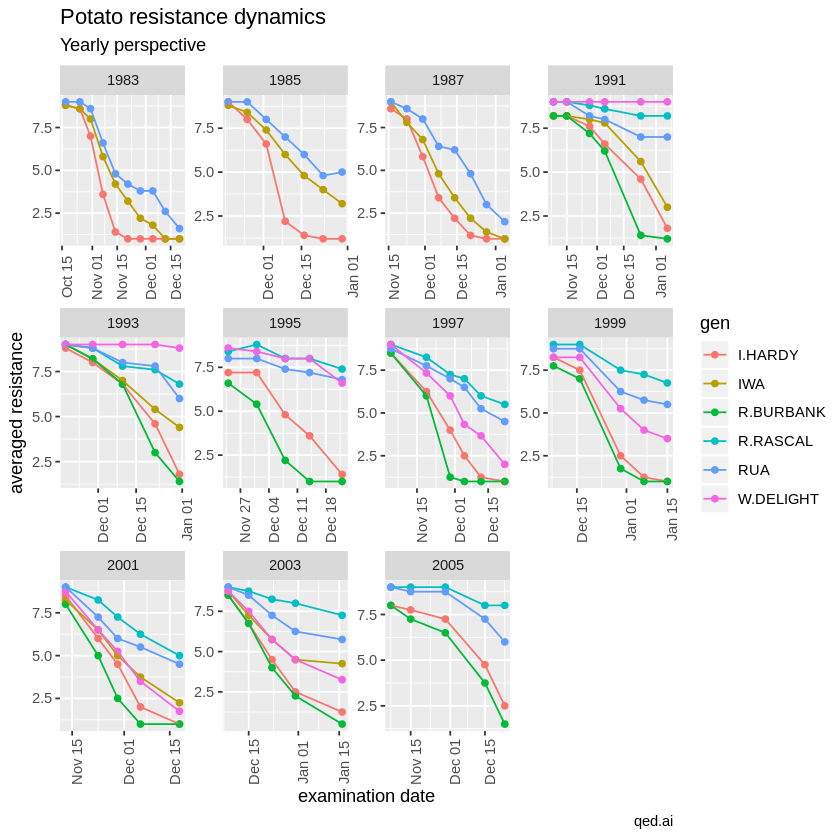

In [0]:
kinds = c("W.DELIGHT", "I.HARDY", "RUA", "R.RASCAL", "IWA", "R.BURBANK")

df_for_kinds = df %>%
    filter(gen %in% kinds) %>%
    group_by(year, date, gen) %>%
    summarize(y=mean(y, na.rm=TRUE))

ggplot(df_for_kinds, aes(x=date, y=y, colour=gen)) +
geom_point() + 
geom_line() +
facet_wrap(~year, scales = "free") +
theme(axis.text.x = element_text(angle = 90)) +
labs(title=paste("Potato resistance dynamics"), subtitle="Yearly perspective", y="averaged resistance", x="examination date", caption="qed.ai")

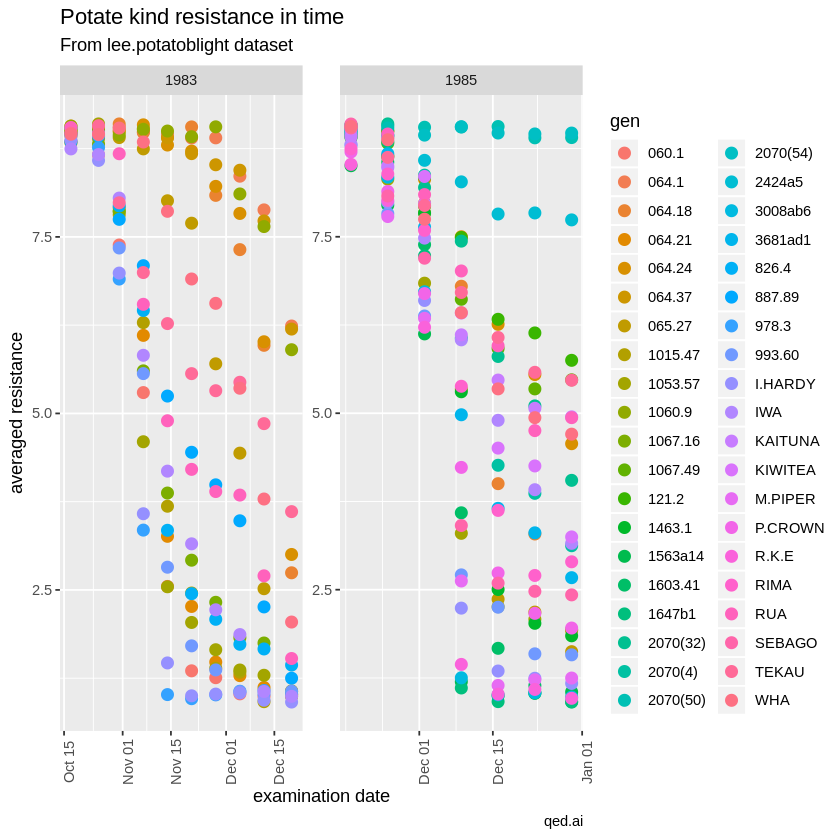

In [0]:
df_av = df %>% filter(year %in% c(1983, 1985)) %>% group_by(year, date, gen) %>% summarize(y=mean(y))

ggplot(df_av, aes(x=date, y=y)) +
    geom_point(aes(col=gen), position=position_jitter(h=0.1, w=0.5), shape = 19, size = 3) +
    facet_wrap(~year, scales="free") +
    labs(title="Potate kind resistance in time", subtitle="From lee.potatoblight dataset", y="averaged resistance", x="examination date", caption="qed.ai") +
    theme(axis.text.x = element_text(angle = 90))